In [134]:
import igraph as ig
import numpy as np
import louvain
import time

print("Construct the graph from the txt file (edgelist)")
########################
# Polblogs
# input = np.loadtxt("../data/PolBlogs/PolBlogsAdj.txt", dtype='i', delimiter='\t');
# dim = input.shape;
# N = dim[0];

# g = ig.Graph();
# g.add_vertices(N);
# for i in range(0, N-1):
#     for j in range(0,N-1):
#         if input[i,j]==1:
#             g.add_edges([(i,j)]);
            
# ig.summary(g)
########################
# Wikivote
# input = np.loadtxt("../data/Wikivote/wiki-Vote.txt", dtype='i', delimiter='\t');
# dim = input.shape;
# g = ig.Graph();
# N = input.max();
# g.add_vertices(N);
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)]);
#     #if np.mod(i,100)==0: 
#      #   print(i)
# ig.summary(g)
########################
# # PowerEU
name = "power_eu"
input = np.loadtxt("../data/PowerEU/ElistPowerEU.txt", dtype='i', delimiter=' ');
dim = input.shape;
N = input.max();
g = ig.Graph();
g.add_vertices(N);
for i in range(0, dim[0]):
    g.add_edges([(input[i,0]-1,input[i,1]-1)]);
ig.summary(g)
########################
# CondMat2003
#g = ig.Graph.Read_Ncol('../data/CondMat2003/CondMat2003EList.txt', directed=False);
########################
# Internet
# g = ig.Graph.Read_Ncol('../data/Internet/InternetElist.txt', directed=False);
########################
# # PowerUS
# input = np.loadtxt("../data/PowerUS/ElistPowerUS.txt", dtype='i', delimiter=' ');
# dim = input.shape;
# N = input.max();
# g = ig.Graph();
# g.add_vertices(N);
# for i in range(0, dim[0]):
#     g.add_edges([(input[i,0]-1,input[i,1]-1)]);
# ig.summary(g)
########################
# # Facebook
# g = ig.Graph.Read_Ncol('../data/Facebook/facebook-gender_edges.txt', directed=False);
########################
# # Pokec
# g = ig.Graph.Read_Ncol('../data/Pokec/soc-pokec-relationships.txt', directed=False);
########################

# selects largest connected component

print("Largest connected component")
largest = g.clusters().giant();
N = largest.vcount()
ig.summary(largest)

Construct the graph from the txt file (edgelist)
IGRAPH U--- 2783 3601 -- 
Largest connected component
IGRAPH U--- 2712 3580 -- 


/var/folders/b7/w5j5st2x5d9f77725jtxfcqh0000gn/T/ipykernel_4185/1478626410.py:70: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  largest = g.clusters().giant();


In [135]:
print("Running Louvain 1 times in C++")
start_time = time.time()

part = louvain.find_partition(largest, louvain.ModularityVertexPartition);

        
print("--- %s seconds ---" % (time.time() - start_time))

print("Modularity :",part.modularity)
print("Sizes of the groups:", part.sizes())
print("Nb of  groups:", len(part.sizes()))

Running Louvain 1 times in C++
--- 0.11680483818054199 seconds ---
Modularity : 0.9214399129240661
Sizes of the groups: [155, 147, 129, 125, 124, 115, 110, 108, 104, 99, 97, 96, 91, 90, 90, 83, 83, 81, 78, 77, 73, 71, 71, 66, 66, 58, 56, 52, 37, 36, 24, 20]
Nb of  groups: 32


In [136]:
# print("Running Louvain 10 times in C++")
# start_time = time.time()

# m_best =0;
# part_best = louvain.find_partition(largest, louvain.ModularityVertexPartition);


# for n in range(10):
#     part = louvain.find_partition(largest, louvain.ModularityVertexPartition);
#     m = part.modularity;

#     if m_best<m:
#         m_best = m;
#         part_best = part;
        

# print("--- %s seconds ---" % (time.time() - start_time))

# print("Modularity :",part_best.modularity)
# print("Sizes of the groups:", part_best.sizes())

In [156]:
import networkx as nx
from node2vec import Node2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
ig.write(largest,filename="edge_lists/"+name+"_largest.txt",format = "edgelist")

In [138]:
largest_nx = largest.to_networkx()
dimensions = 32
# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(largest_nx, dimensions=dimensions, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4) 

Computing transition probabilities:   0%|          | 0/2712 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:53<00:00,  1.07s/it]


KeyboardInterrupt: 

In [ ]:
# construct numpy vector on embedding
vector = model.wv
np_vector = np.zeros((N, dimensions))
for i in range(0, N-1):
    np_vector[i,:] = vector[i]

In [ ]:
pca = PCA(n_components=10)
pca.fit(np_vector)
#print(pca.singular_values_)
embedding = pca.transform(np_vector)

max_nb_clusters = 30
modularities = [] 
for k in range(2,max_nb_clusters+1):
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(np_vector)
    community = kmeans.labels_
    mod_partition = largest.modularity(community)
    print(mod_partition)
    modularities.append(mod_partition)

modularities

2
0.001479551952873026
3
0.016454289531093888
4
0.013000080877946053
5
0.013716973943690034
6
0.022447828633043284
7
0.02250333831596536
8
0.011628956512784257
9
0.026372303812022338
10
0.02312193996977745
11
0.02408255895417416
12
0.020200765338866413
13
0.020842125392290578
14
0.01722530665924434
15
0.015187885244934474
16
0.01253387522187874
17
0.014931815339500231
18
0.012150490997690284
19
0.011713934281810806
20
0.010890139758582178
21
0.017948119218254947
22
0.019727954335200935
23
0.018461832459648598
24
0.019477923564965433
25
0.02114390686288492
26
0.016975188244337667
27
0.0180471173522971
28
0.017724687910124878
29
0.018460822459152315
30
0.018424769893228533


[0.001479551952873026,
 0.016454289531093888,
 0.013000080877946053,
 0.013716973943690034,
 0.022447828633043284,
 0.02250333831596536,
 0.011628956512784257,
 0.026372303812022338,
 0.02312193996977745,
 0.02408255895417416,
 0.020200765338866413,
 0.020842125392290578,
 0.01722530665924434,
 0.015187885244934474,
 0.01253387522187874,
 0.014931815339500231,
 0.012150490997690284,
 0.011713934281810806,
 0.010890139758582178,
 0.017948119218254947,
 0.019727954335200935,
 0.018461832459648598,
 0.019477923564965433,
 0.02114390686288492,
 0.016975188244337667,
 0.0180471173522971,
 0.017724687910124878,
 0.018460822459152315,
 0.018424769893228533]

<function matplotlib.pyplot.show(close=None, block=None)>

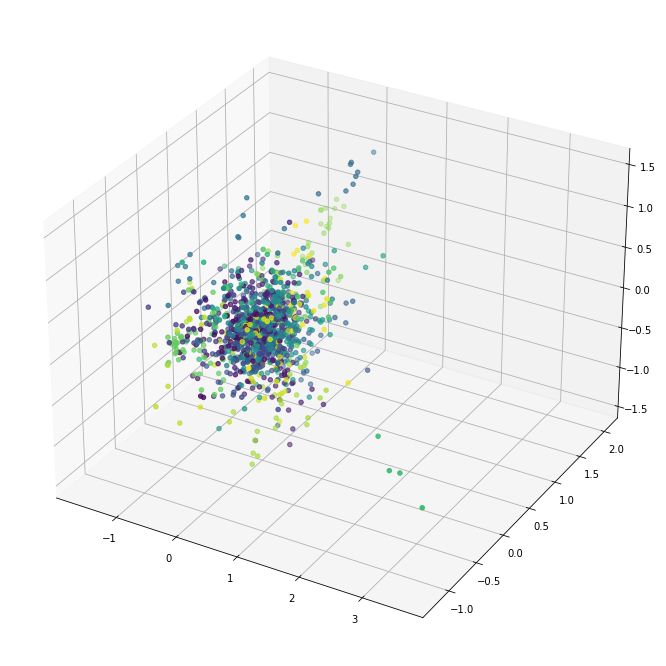

In [ ]:
x=embedding[:,1]
y=embedding[:,2]
z=embedding[:,3]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z,c=community)
plt.show